# PR曲线

绘制每个类别的PR曲线，计算AP值。

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

## 导入工具包

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID -easy

In [4]:
dataset_name = 'test_easy_classes'
model_path = './models/2023-10-09-01-47_max_epoch_100/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入类别名称和ID -hard

In [26]:
dataset_name = 'test_hard_classes'
model_path = './models/2023-10-09-01-47_max_epoch_100/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入测试集预测结果表格

In [27]:
df = pd.read_csv(model_path + dataset_name + '-测试集预测结果.csv')

In [28]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,covering-预测置信度,device-预测置信度,domestic_animal-预测置信度,mater-预测置信度,person-预测置信度,plant-预测置信度,structure-预测置信度,vertebrate-预测置信度
0,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,4,person,3,mater,True,0.801112,0.006859,0.002550,0.015600,0.158353,0.006221,0.005665,0.003641
1,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,6,structure,3,mater,0,covering,True,0.113383,0.027640,0.006023,0.259255,0.044438,0.006826,0.538320,0.004116
2,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,4,person,2,domestic_animal,True,0.600943,0.008280,0.050587,0.032752,0.277345,0.005105,0.013126,0.011862
3,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,3,mater,1,device,False,0.017682,0.046715,0.005153,0.087193,0.813342,0.003787,0.019615,0.006513
4,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,3,mater,4,person,True,0.681542,0.039885,0.012647,0.156968,0.054006,0.019469,0.012044,0.023439


## 绘制某一类别的PR曲线

In [29]:
specific_class = 'covering'

In [30]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [31]:
# 二分类预测置信度
y_score = df[specific_class + '-预测置信度']

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
AP = average_precision_score(y_test, y_score, average='weighted')

In [33]:
AP

0.5012137309172878

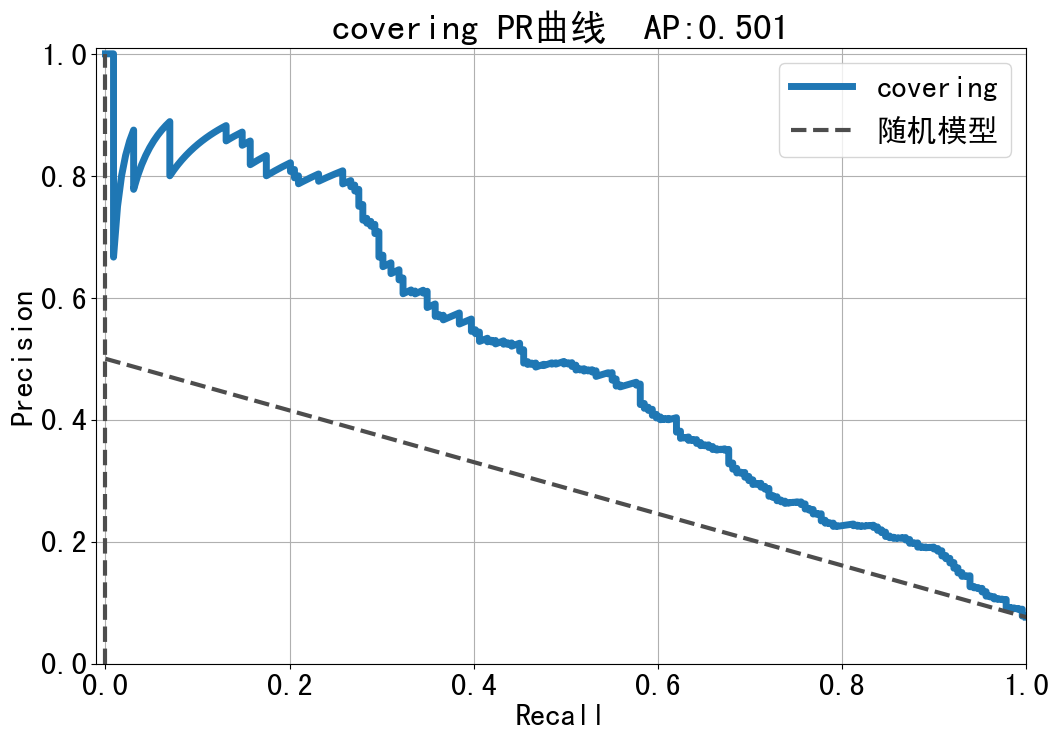

In [34]:
plt.figure(figsize=(12, 8))
# 绘制 PR 曲线
plt.plot(recall, precision, linewidth=5, label=specific_class)

# 随机二分类模型
# 阈值小，所有样本都被预测为正类，recall为1，precision为正样本百分比
# 阈值大，所有样本都被预测为负类，recall为0，precision波动较大
plt.plot([0, 0], [0, 1], ls="--", c='.3', linewidth=3, label='随机模型')
plt.plot([0, 1], [0.5, sum(y_test==1)/len(df)], ls="--", c='.3', linewidth=3)

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} PR曲线  AP:{:.3f}'.format(specific_class, AP))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.savefig('{}-PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 绘制所有类别的ROC曲线

In [35]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [36]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [37]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

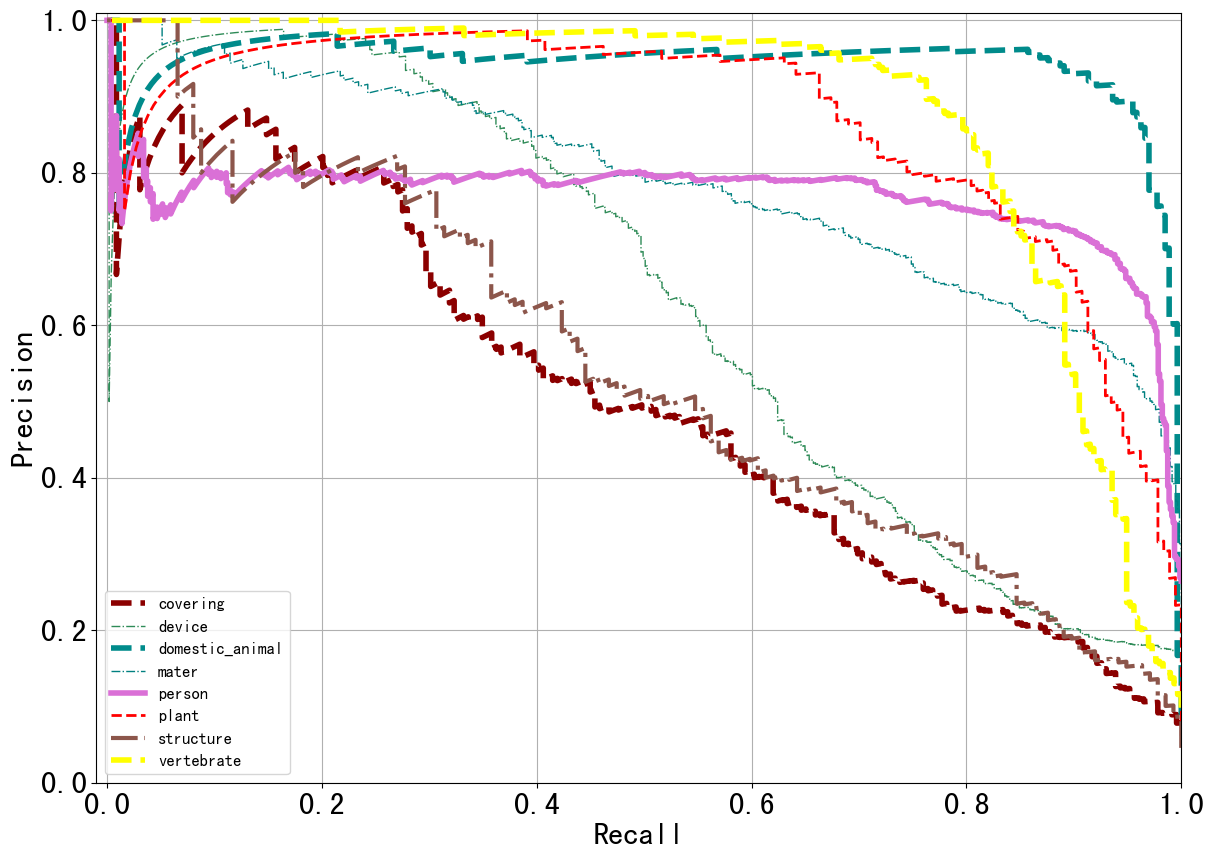

In [38]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
# plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.rcParams['font.size'] = 22
plt.grid(True)

ap_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    AP = average_precision_score(y_test, y_score, average='weighted')
    plt.plot(recall, precision, **get_line_arg(), label=each_class)
    plt.legend()
    ap_list.append(AP)

plt.legend(loc='best', fontsize=12)
plt.savefig(model_path + dataset_name + '-各类别PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AP增加至`各类别准确率评估指标`表格中

In [40]:
df_report = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [41]:
df_report

,类别,precision,recall,f1-score,support,accuracy
0,covering,0.651376,0.310044,0.420118,229.0,0.310044
1,device,0.799228,0.405088,0.537662,511.0,0.405088
2,domestic_animal,0.882759,0.962406,0.920863,266.0,0.962406
3,mater,0.615196,0.858120,0.716631,585.0,0.858120
4,person,0.722503,0.902900,0.802691,793.0,0.902900
5,plant,0.836364,0.750000,0.790831,184.0,0.750000
6,structure,0.572581,0.518248,0.544061,137.0,0.518248
7,vertebrate,0.902439,0.752542,0.820702,295.0,0.752542
8,macro avg,0.747806,0.682419,0.694195,3000.0,0.682419
9,weighted avg,0.741258,0.727667,0.711274,3000.0,0.727667


In [42]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(ap_list)
weighted_avg_auc = sum(ap_list * df_report.iloc[:-2]['support'] / len(df))

In [43]:
ap_list.append(macro_avg_auc)
ap_list.append(weighted_avg_auc)

In [44]:
df_report['AP'] = ap_list

In [45]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP
0,covering,0.651376,0.310044,0.420118,229.0,0.310044,0.501214
1,device,0.799228,0.405088,0.537662,511.0,0.405088,0.633223
2,domestic_animal,0.882759,0.962406,0.920863,266.0,0.962406,0.943113
3,mater,0.615196,0.858120,0.716631,585.0,0.858120,0.788336
4,person,0.722503,0.902900,0.802691,793.0,0.902900,0.768013
5,plant,0.836364,0.750000,0.790831,184.0,0.750000,0.867867
6,structure,0.572581,0.518248,0.544061,137.0,0.518248,0.539601
7,vertebrate,0.902439,0.752542,0.820702,295.0,0.752542,0.883298
8,macro avg,0.747806,0.682419,0.694195,3000.0,0.682419,0.740583
9,weighted avg,0.741258,0.727667,0.711274,3000.0,0.727667,0.751207


In [46]:
df_report.to_csv(model_path + dataset_name + '-各类别准确率评估指标.csv', index=False)